In [73]:
# Importing the modules requried

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
# Londing the data for csv file
# encoding='latin1'	Use Latin-1 (Western European) encoding to interpret special characters

data = pd.read_csv('D:/Project/Data Analysis Project/Top Youtubers Dataset.csv',encoding='latin1')

In [75]:
data.head()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.590000e+11,21237,Music,2006
2,3,YouTube Movies,181000000,0.000000e+00,0,Film & Animation,2015
3,4,Cocomelon - Nursery Rhymes,177000000,1.830000e+11,1188,Education,2006
4,5,SET India,174000000,1.650000e+11,139720,Shows,2006


In [76]:
# Shows the Index

data.index

RangeIndex(start=0, stop=1000, step=1)

In [77]:
# Shows the columns

data.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Video Count',
       'Category', 'Started'],
      dtype='object')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   Subscribers  1000 non-null   int64  
 3   Video Views  1000 non-null   float64
 4   Video Count  1000 non-null   int64  
 5   Category     957 non-null    object 
 6   Started      1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [79]:
# Shows the number of (Rows, Columns) 

data.shape

(1000, 7)

In [80]:
# Shows the null values in the columns (True or False)

data.isnull()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [81]:
# Shows the count of null values in columns

data.isnull().sum()

Rank            0
Youtuber        0
Subscribers     0
Video Views     0
Video Count     0
Category       43
Started         0
dtype: int64

In [82]:
# Drop rows with missing values

data.dropna(inplace=True)

In [83]:
data.shape

(957, 7)

In [84]:
# Rename the columns

data = data.rename(columns={'Youtuber':'Channel', 'Video Views':'Views', 'Video Count':'Uploads', 'Started':'Created On'})

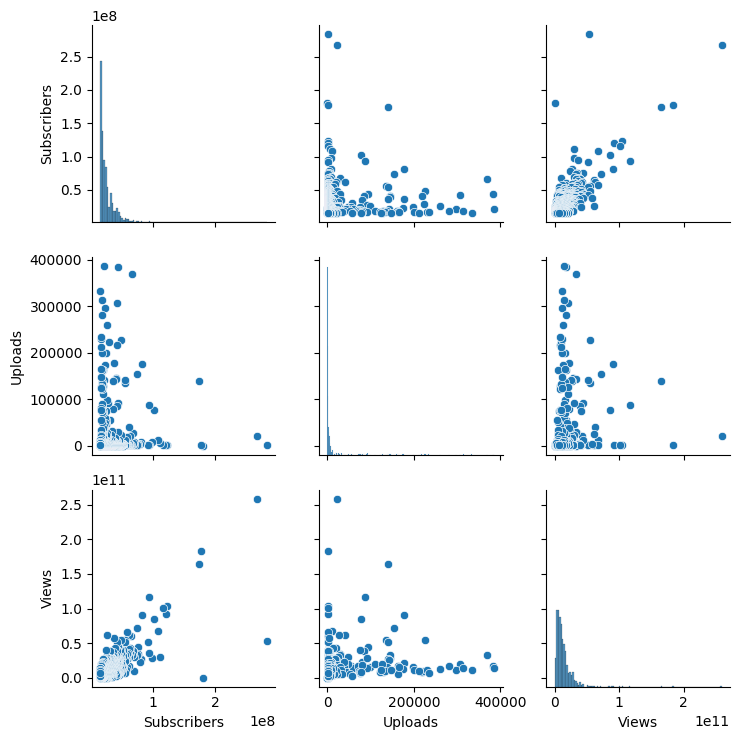

In [85]:
sns.pairplot(data[['Subscribers', 'Uploads', 'Views']])
plt.tight_layout()
plt.show()

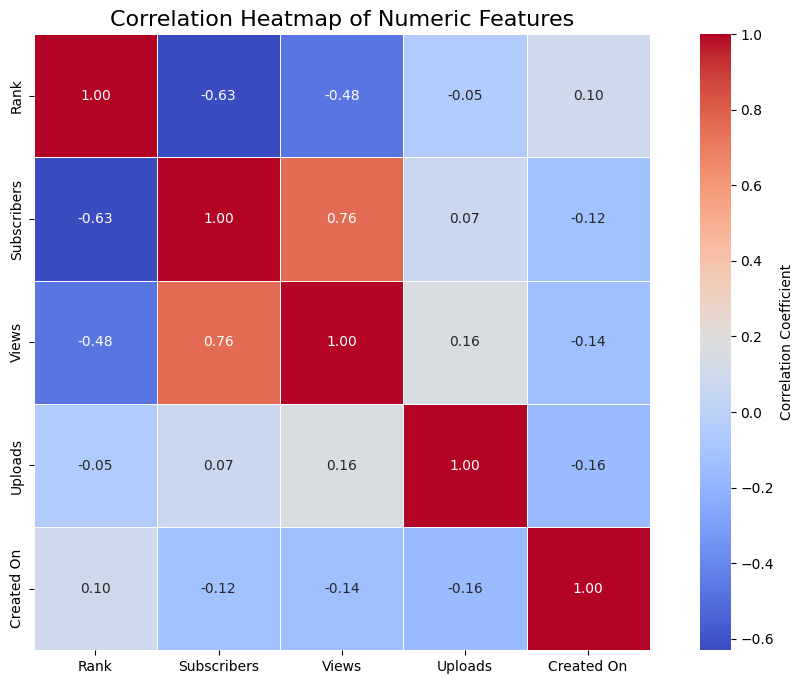

In [86]:
# The correlation of features of the data

corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(13, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

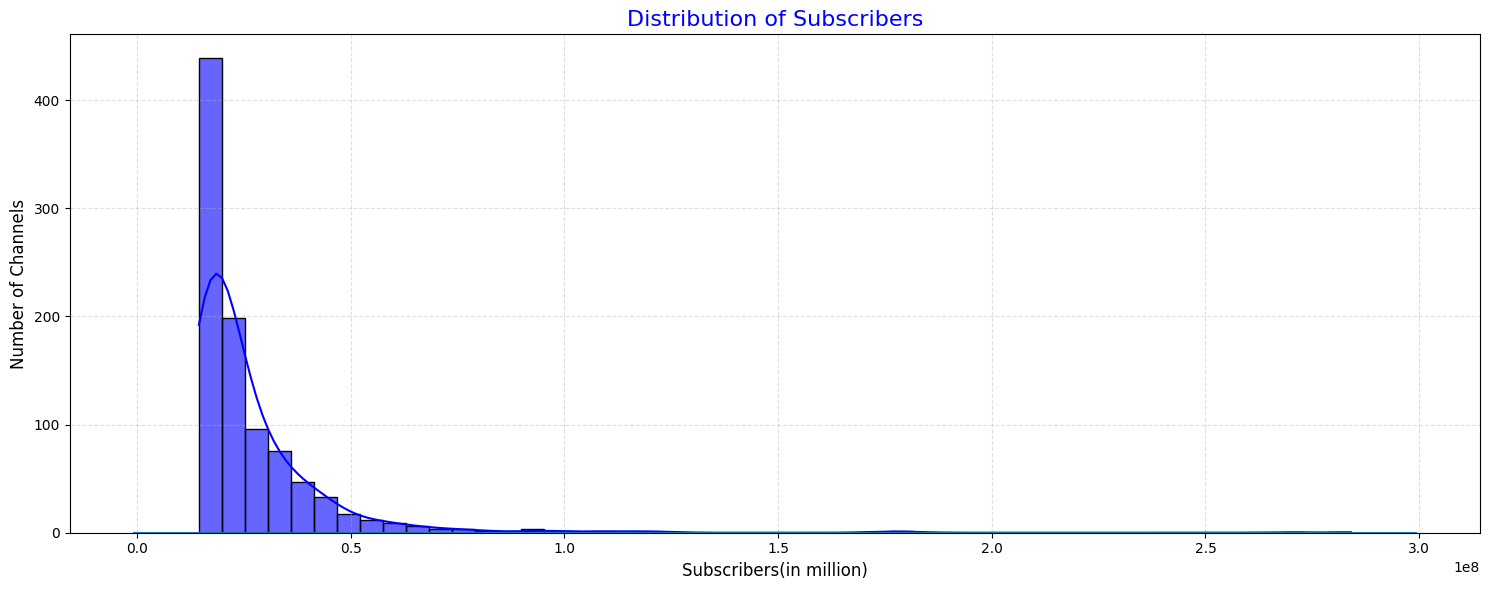

In [87]:
# This hisplot tell Distribution of Subscribers, i.e., number of channels per subscribers(million) range.

plt.figure(figsize=(15,6))
sns.histplot(data['Subscribers'], bins=50, kde=True, color='blue', edgecolor='black', alpha=0.6)
sns.kdeplot(data['Subscribers'])
plt.title("Distribution of Subscribers", size=16, color='blue')
plt.xlabel("Subscribers(in million)", size=12)
plt.ylabel("Number of Channels", size=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

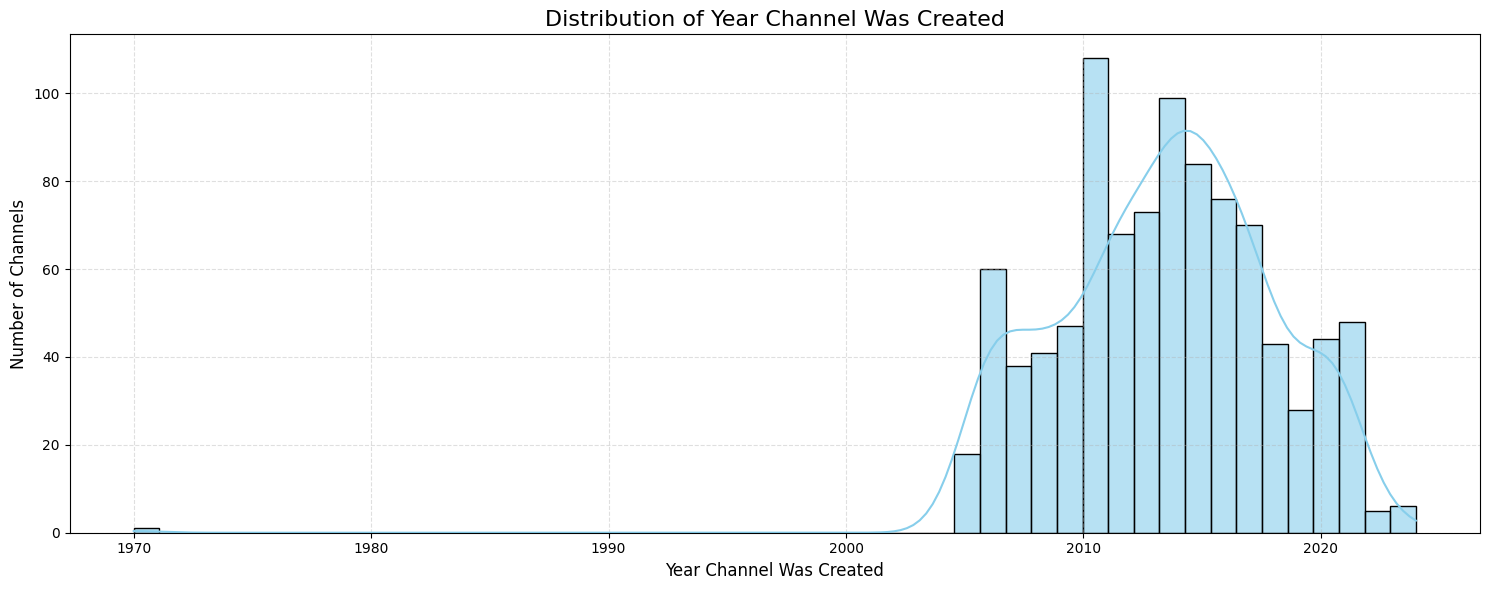

In [88]:
# This hisplot tell Distribution of Year Channel Was Created, i.e., number of channels per Year. 

plt.figure(figsize=(15,6))
sns.histplot(data['Created On'], bins=50, kde=True, alpha=0.6, color='skyblue', edgecolor= 'black')
plt.title("Distribution of Year Channel Was Created", size=16)
plt.xlabel("Year Channel Was Created", size=12)
plt.ylabel("Number of Channels", size=12)
plt.grid(True, linestyle='--',alpha=0.4)
plt.tight_layout()
plt.show()

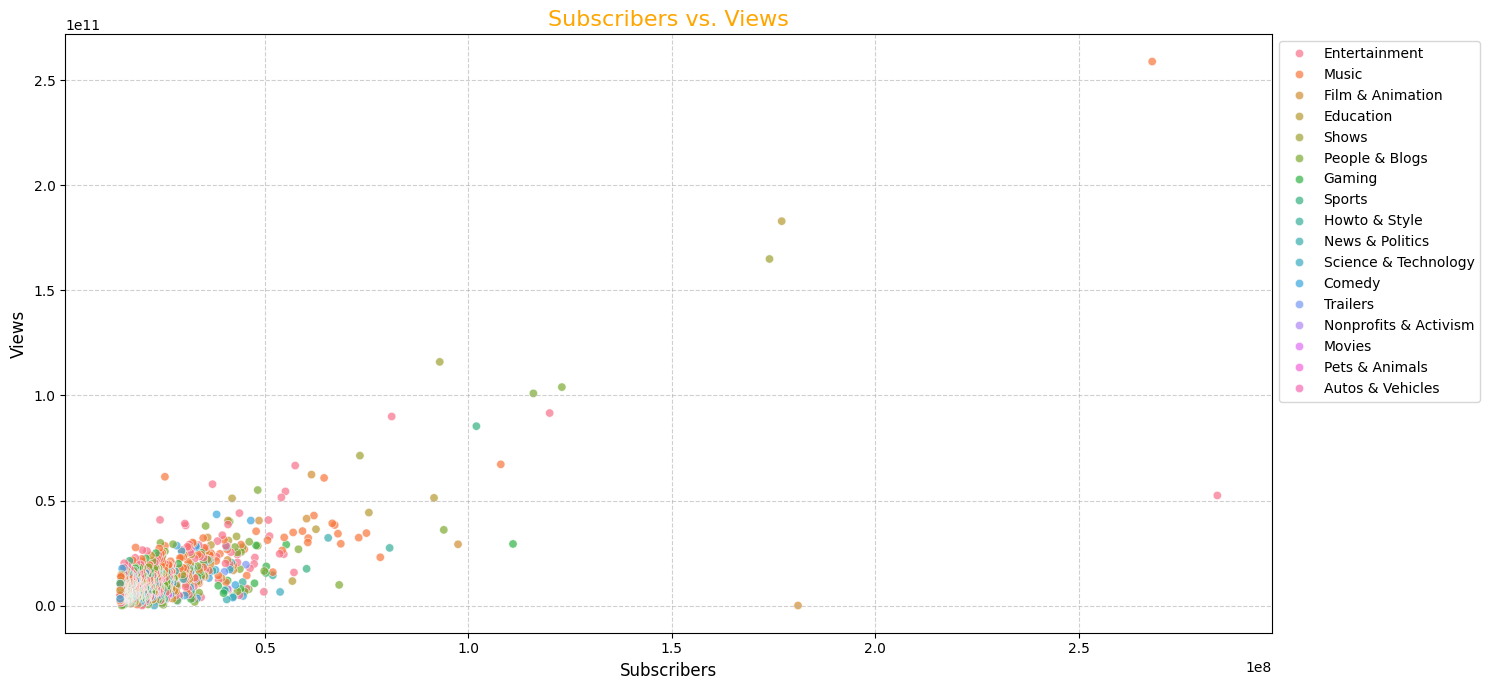

Correlation between Subscribers and Video Views: 0.76


In [89]:
# scatterplot of Subscribers and Views

plt.figure(figsize=(15,7))

sns.scatterplot(x='Subscribers', y='Views', data=data, hue='Category', alpha=0.7)

plt.title('Subscribers vs. Views', size=16, color='orange')
plt.xlabel('Subscribers', size=12)
plt.ylabel('Views', size=12)

plt.grid(True, alpha=0.6, linestyle='--')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = data['Subscribers'].corr(data['Views'])
print(f'Correlation between Subscribers and Video Views: {correlation:.2f}')

C:\Users\shash\AppData\Local\Temp\ipykernel_21240\3956206235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Views', y='Channel', data=top_Views, palette='magma')


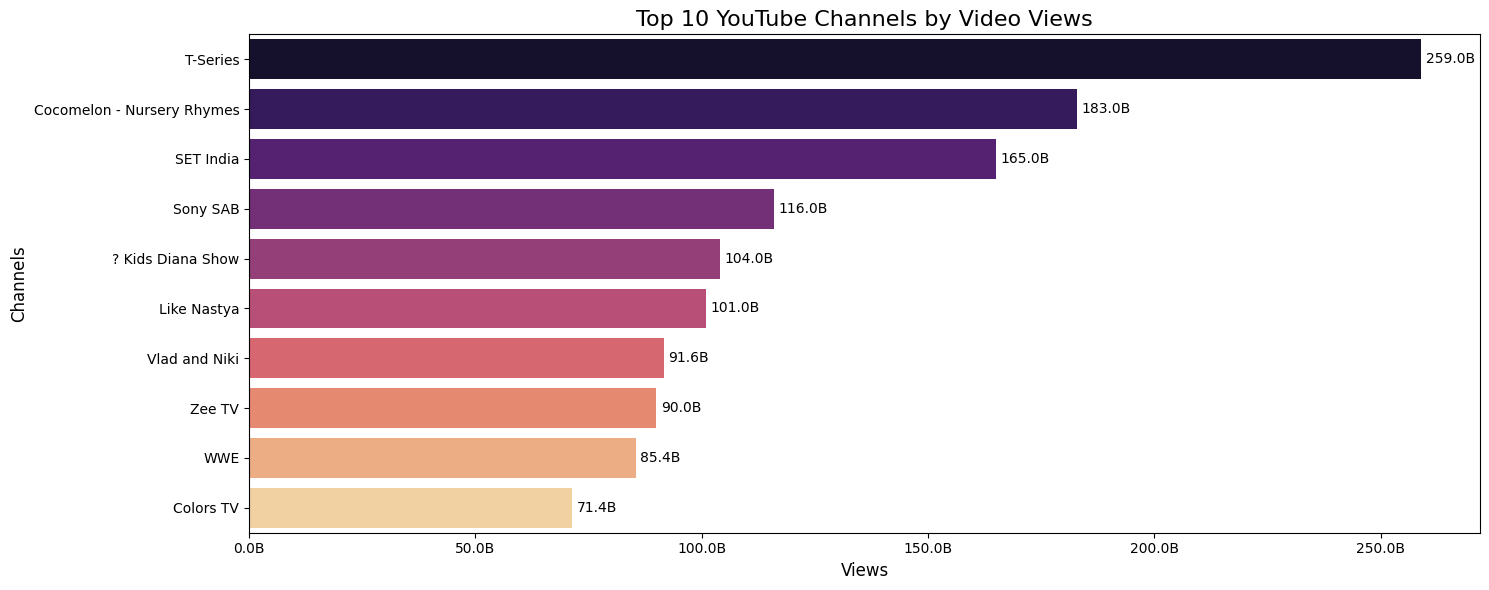

In [90]:
top_Views = data.sort_values(by='Views', ascending=False).head(10).reset_index(drop=True)

plt.figure(figsize=(15, 6))
sns.barplot(x='Views', y='Channel', data=top_Views, palette='magma')

plt.title('Top 10 YouTube Channels by Video Views', fontsize=16)
plt.xlabel('Views', fontsize=12)
plt.ylabel('Channels', fontsize=12)

# Format x-axis to billions
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))

# Add annotations
for i, v in enumerate(top_Views['Views']):
    plt.text(v + 1e9, i, f'{v/1e9:.1f}B', va='center', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_21240\2393495713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data, order=data['Category'].value_counts().index, palette='coolwarm')


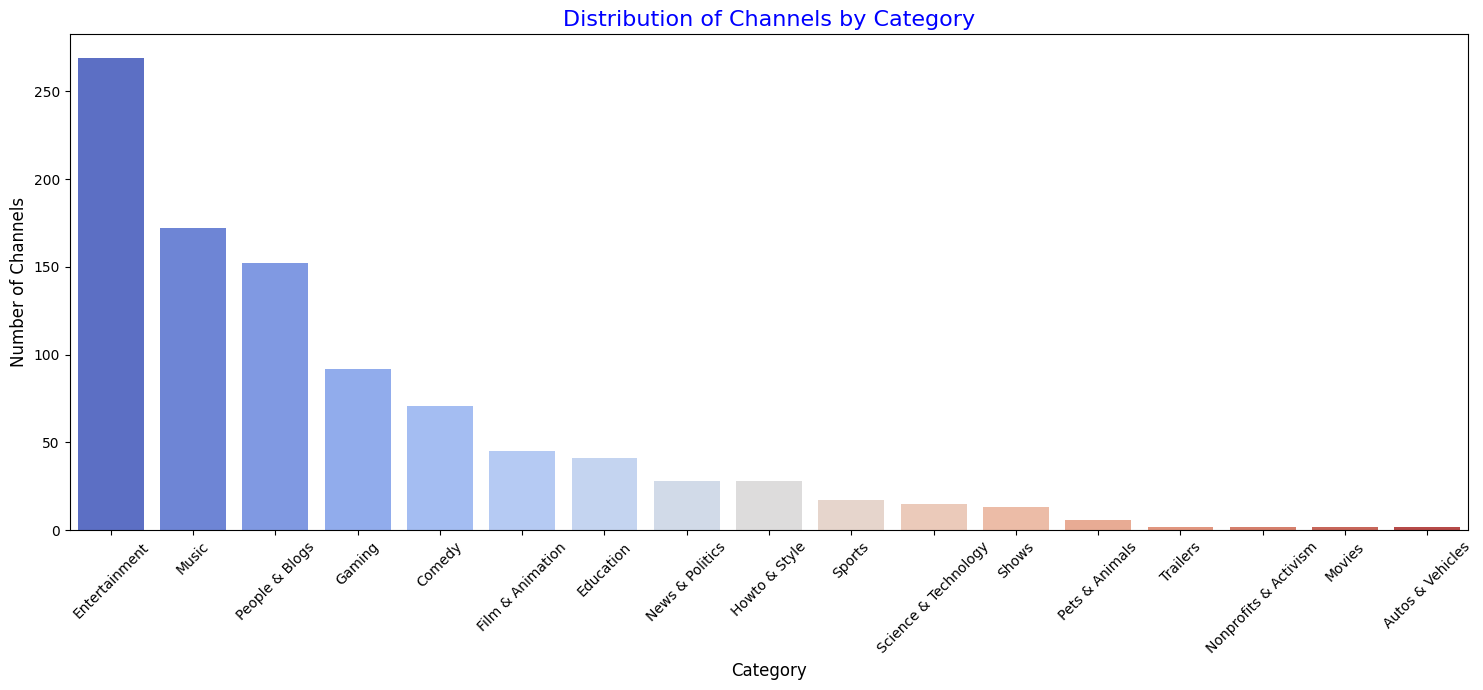

In [91]:
# plot countplot on Channels and Category

plt.figure(figsize=(15,7))

sns.countplot(x='Category', data=data, order=data['Category'].value_counts().index, palette='coolwarm')

plt.title('Distribution of Channels by Category', size=16, color='blue')
plt.xlabel('Category', size=12)
plt.ylabel('Number of Channels', size=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_21240\732392510.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data['Uploads'], vert=True, patch_artist=True, labels=['Videos'])


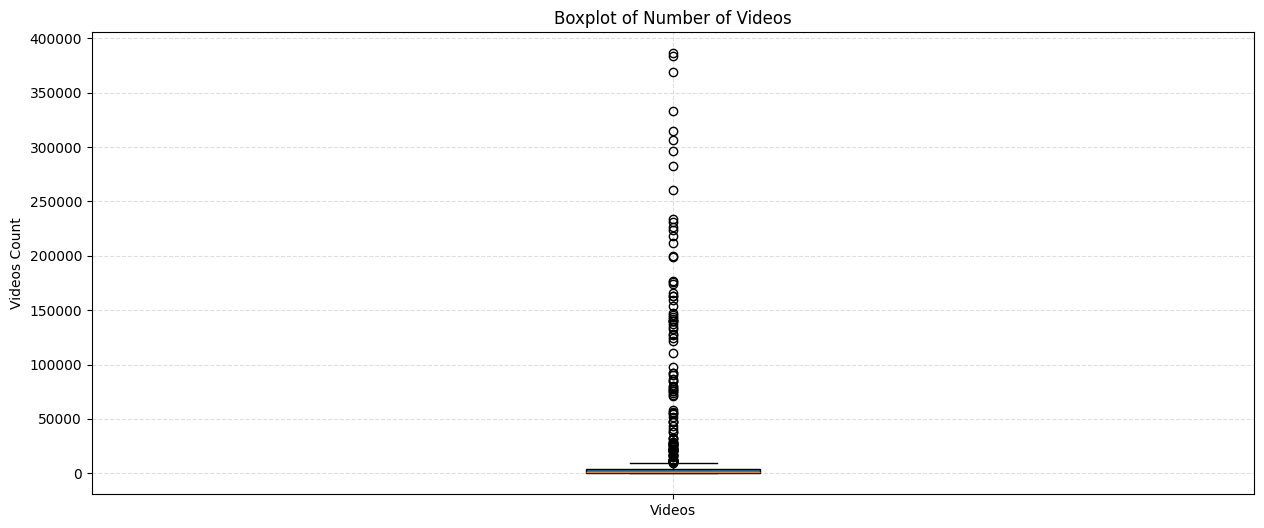

In [92]:
# This boxplot tells the Videos count

plt.figure(figsize=(15,6))
plt.boxplot(data['Uploads'], vert=True, patch_artist=True, labels=['Videos'])
plt.title('Boxplot of Number of Videos')
plt.ylabel('Videos Count')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_21240\3872009729.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subscribers', y='Channel', data=top_Subscribers, edgecolor='black', palette='viridis')


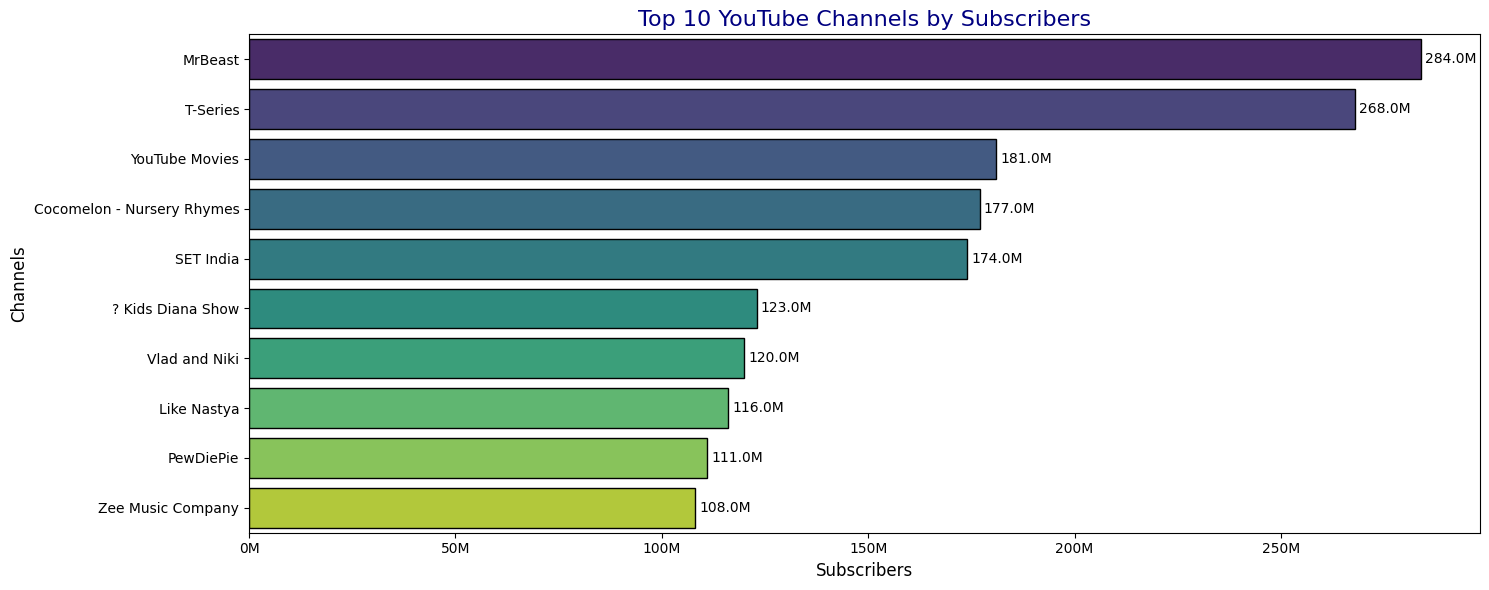

In [93]:
# This barplot of Channel and Subscribers to know top 10 Channel by Subscribers

top_Subscribers = data.sort_values(by='Subscribers', ascending=False).head(10).reset_index(drop=True)

plt.figure(figsize=(15, 6))
sns.barplot(x='Subscribers', y='Channel', data=top_Subscribers, edgecolor='black', palette='viridis')

plt.title('Top 10 YouTube Channels by Subscribers', fontsize=16, color='navy')
plt.xlabel('Subscribers', fontsize=12)
plt.ylabel('Channels', fontsize=12)

# Format x-axis ticks to show commas and M
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:,.0f}M'))

# Text labels with 1 decimal
for i, v in enumerate(top_Subscribers['Subscribers']):
    plt.text(v + 1e6, i, f'{v/1e6:.1f}M', va='center', fontsize=10)

plt.tight_layout()
plt.show()

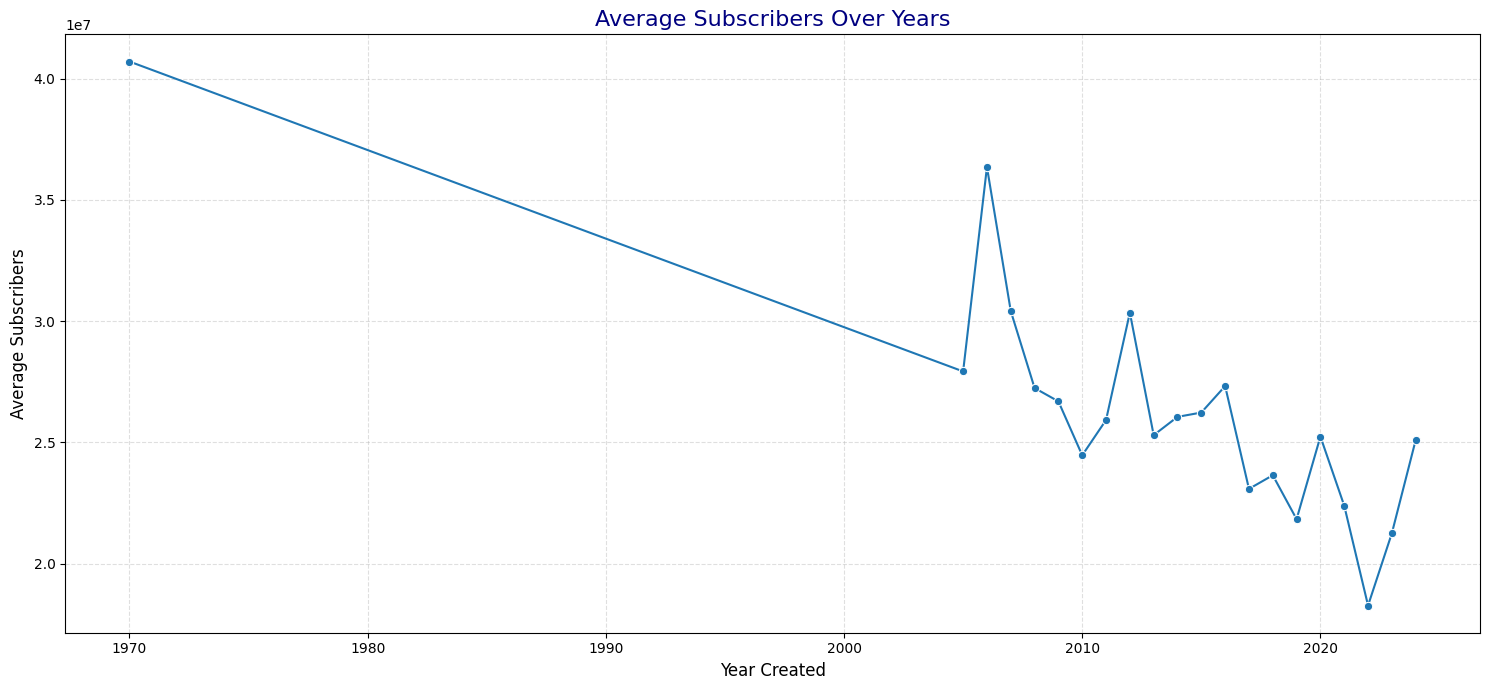

In [94]:
# lineplot of Created On and Subscribers to show Average Subscribers Over Years

subscribers_by_year = data.groupby('Created On')['Subscribers'].mean().reset_index()

plt.figure(figsize=(15,7))
sns.lineplot(x='Created On', y='Subscribers', data=subscribers_by_year, marker='o')

plt.title('Average Subscribers Over Years', size=16, color='Navy')
plt.xlabel('Year Created', size=12)
plt.ylabel('Average Subscribers', size=12)

plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()


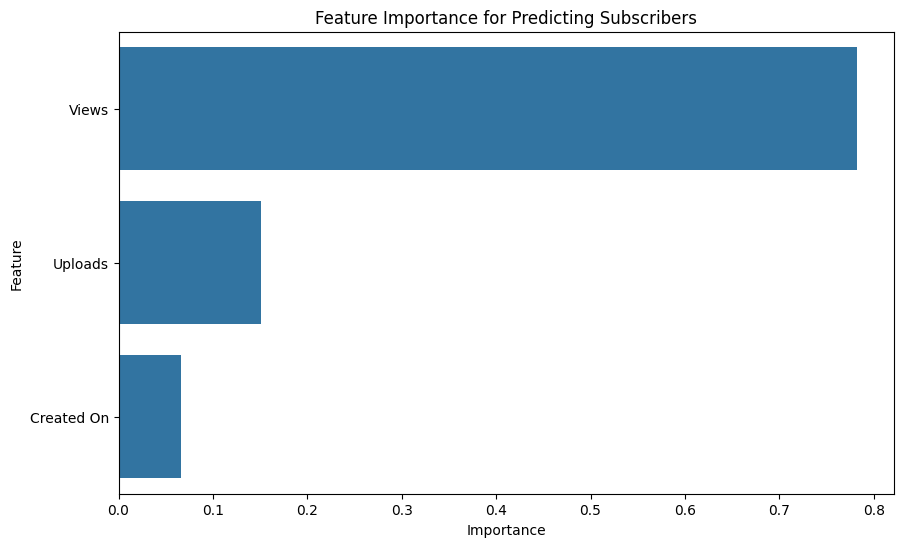

In [95]:
# Select features and new target
features = ['Views', 'Uploads', 'Created On']
target = 'Subscribers'

X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance for Predicting Subscribers")
plt.show()


In [96]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 10859641.057412226
R² Score: 0.030689564250609647
